In [594]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import loadmat
import glob  
import seaborn as sns
import pandas as pd
import statannot
sns.set_style("white")


In [98]:
list_of_all_files=(glob.glob("../../data/3_DrosophilaOpto/*.mat"))

wild_nostim_files=(glob.glob("../../data/3_DrosophilaOpto/21o04004*.mat"))
wild_stim_files=(glob.glob("../../data/3_DrosophilaOpto/21o04014*.mat"))
P1_stim_files=(glob.glob("../../data/3_DrosophilaOpto/21o04016*.mat"))
P1_nostim_files=(glob.glob("../../data/3_DrosophilaOpto/21o04017*.mat"))
pIP10_stim_files=(glob.glob("../../data/3_DrosophilaOpto/21o04020*.mat"))
VPR6_stim_files=(glob.glob("../../data/3_DrosophilaOpto/21o04021*.mat"))


In [610]:
def plot_mat(genotype, raw, times, sines, pulses, xlim=None, ylim=None):
    # from toturial
    fig,axs = plt.subplots(sharex=True, figsize=(10,2))

    # plot raw mic trace
    axs.plot(times,raw[:,0], color='grey') 
    axs.set_ylabel('Amplitude (a.u.)')
    axs.set_xlabel('Time (sec)')

    #unpack sine annotation
    sine_starts = sines[0].astype(int)     # start coord of a sine song bout
    sine_ends = sines[1].astype(int)       # end coord of a sine song bout

    sine_cfs = sines[2]                    # carrier freq of that bout
    sine_cft = times[((sine_starts + sine_ends)/2).astype(int)] # plot CF at the center of the detected feature

    #unpack pulse annotation
    pulse_starts = pulses[1].astype(int)   # start coord of an individual pulse
    pulse_ends = pulses[2].astype(int)     # end coord of an individual pulse

    pulse_cfs = pulses[3]                  # carrier freq of that individual pulse
    pulse_cft = times[((pulse_starts + pulse_ends)/2).astype(int)] # time coord at center of that pulse
 
    #plot sines in red, pulses in blue
    for i in range(len(sine_starts)):
        if abs(times[sine_starts[i]]-times[sine_ends[i]])<1:
            sine_line = axs.plot(times[sine_starts[i]:sine_ends[i]],
                                    raw[sine_starts[i]:sine_ends[i],0],
                                    color='coral')

    for i in range(len(pulse_starts)):
        pulse_line = axs.plot(times[pulse_starts[i]:pulse_ends[i]],
                                raw[pulse_starts[i]:pulse_ends[i],0],
                                color='cadetblue')

    #legend
    axs.scatter([], [], c="coral", label="sine song", s=20)  # make an empty scatter plot to generate the legend from
    axs.scatter([], [], c="cadetblue", label="pulse song", s=20)
    #axs[0].legend(loc="best")
    #axs[0].set_title(file)
    axs.set_title(genotype)
    axs.set_ylim(ylim)

    # second y axis (dots): carrier frequencies
#     axs[1].plot(sine_cft, sine_cfs, marker='.', color='coral', linewidth=0)
#     axs[1].plot(pulse_cft, pulse_cfs, marker='.', color='cadetblue', linewidth=0)
#     axs[1].set_xlabel('Time (sec)')
#     axs[1].set_ylabel('Frequency (Hz)')
    
    axs2 = axs.twinx()

    # third y axis: LED stimulus
    axs2.plot(times, raw[:,1], color='black', label='LED stimulation', alpha=.1)
    axs2.set_ylabel('LED stim (V)')
    axs2.set_xlabel('Time (sec)')
    axs2.set_ylim(0,10)
    

    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.xlim(xlim)
    plt.show()
    

In [611]:
plot_ylim = [-500,500]

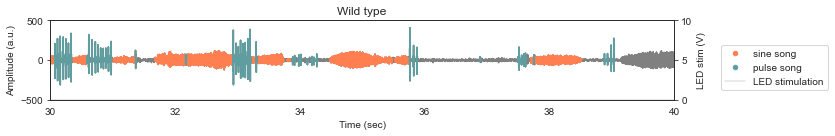

In [612]:
file_path_tmp = '../../data/3_DrosophilaOpto/21o04004_1.mat'
mat_tmp=loadmat(file_path_tmp)

raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
times = times.squeeze()

plot_mat('Wild type', raw, times, sines, pulses, [30,40], plot_ylim)

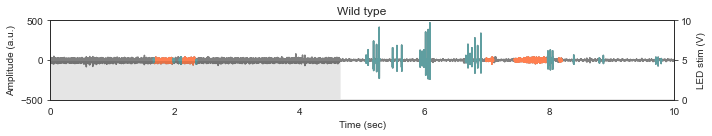

In [340]:
file_path_tmp = '../../data/3_DrosophilaOpto/21o04014_7.mat'
mat_tmp=loadmat(file_path_tmp)

raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
times = times.squeeze()
plot_mat('Wild type', raw, times, sines, pulses, [0,10], plot_ylim)

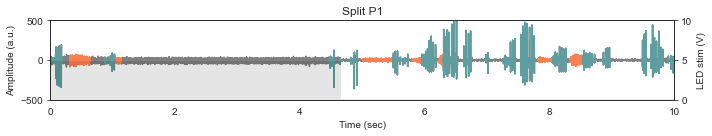

In [341]:
file_path_tmp = '../../data/3_DrosophilaOpto/21o04016_1.mat'
mat_tmp=loadmat(file_path_tmp)

raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
times = times.squeeze()
plot_mat('Split P1', raw, times, sines, pulses, [0,10], plot_ylim)

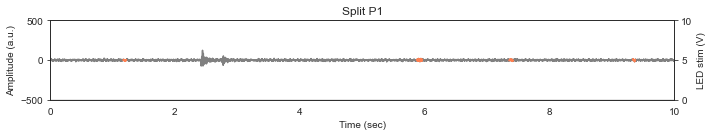

In [342]:
file_path_tmp = '../../data/3_DrosophilaOpto/21o04017_1.mat'
mat_tmp=loadmat(file_path_tmp)

raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
times = times.squeeze()
plot_mat('Split P1', raw, times, sines, pulses, [0,10], plot_ylim)

In [466]:
P1_sine_freq = []
P1_sine_len = []
P1_pulse_freq = []
P1_pulse_len = []
P1_IPI = []
P1_mean_pulse_time = []
P1_start_pulse_time = []
P1_N_bouts = []

P1_nostim_sine_freq = []
P1_nostim_sine_len = []
P1_nostim_pulse_freq = []
P1_nostim_pulse_len = []


pIP10_sine_freq = []
pIP10_sine_len = []
pIP10_pulse_freq = []
pIP10_pulse_len = []
pIP10_IPI = []
pIP10_mean_pulse_time = []
pIP10_start_pulse_time = []
pIP10_N_bouts = []



VPR6_sine_freq = []
VPR6_sine_len = []
VPR6_pulse_freq = []
VPR6_pulse_len = []
VPR6_IPI = []
VPR6_mean_pulse_time = []
VPR6_start_pulse_time = []
VPR6_N_bouts = []


wt_sine_freq = []
wt_sine_len = []
wt_pulse_freq = []
wt_pulse_len = []
wt_IPI = []
wt_mean_pulse_time = []
wt_start_pulse_time = []
wt_N_bouts = []
 
wt_stim_sine_freq = []
wt_stim_sine_len = []
wt_stim_pulse_freq = []
wt_stim_pulse_len = []

In [467]:

for file in P1_stim_files:
    mat_tmp=loadmat(file)
    raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
    times = times.squeeze()
    
    #plot_mat(file, raw, times, sines, pulses)
    good_sine_ids = np.abs(times[sines[0].astype(int)]-times[sines[1].astype(int)])<1 #not too long

    P1_sine_freq.extend(sines[2][good_sine_ids])
    P1_sine_len.extend(sines[1][good_sine_ids] - sines[0][good_sine_ids])
    P1_pulse_freq.extend(pulses[3])
    P1_pulse_len.extend(pulses[1]-pulses[0])

    
    P1_IPI.extend([b-e for b,e in np.array([times[pulses[1][1:]], times[pulses[2][:-1]]]).T])
    P1_mean_pulse_time.extend(times[((pulses[1] + pulses[2])/2).astype(int)] )
    P1_start_pulse_time.extend(times[(pulses[1]).astype(int)] )
    P1_N_bouts.append([len(good_sine_ids),len(pulses[3])])

for file in P1_nostim_files:
    mat_tmp=loadmat(file)
    raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
    times = times.squeeze()
    
    #plot_mat(file, raw, times, sines, pulses)
    good_sine_ids = np.abs(times[sines[0].astype(int)]-times[sines[1].astype(int)])<1 #not too long

    P1_nostim_sine_freq.extend(sines[2][good_sine_ids])
    P1_nostim_sine_len.extend(sines[1][good_sine_ids] - sines[0][good_sine_ids])
    P1_nostim_pulse_freq.extend(pulses[3])
    P1_nostim_pulse_len.extend(pulses[1]-pulses[0])

    
for file in pIP10_stim_files:
    mat_tmp=loadmat(file)
    raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
    times = times.squeeze()
    
    #plot_mat(file, raw, times, sines, pulses)
    good_sine_ids = np.abs(times[sines[0].astype(int)]-times[sines[1].astype(int)])<1 #not too long

    pIP10_sine_freq.extend(sines[2][good_sine_ids])
    pIP10_sine_len.extend(sines[1][good_sine_ids] - sines[0][good_sine_ids])
    pIP10_pulse_freq.extend(pulses[3])
    pIP10_pulse_len.extend(pulses[1]-pulses[0])
    
    
    pIP10_IPI.extend([b-e for b,e in np.array([times[pulses[1][1:]], times[pulses[2][:-1]]]).T])
    pIP10_mean_pulse_time.extend(times[((pulses[1] + pulses[2])/2).astype(int)] )
    pIP10_start_pulse_time.extend(times[(pulses[1]).astype(int)] )

    pIP10_N_bouts.append([len(good_sine_ids),len(pulses[3])])

    
for file in VPR6_stim_files:
    mat_tmp = loadmat(file)
    
    raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
    times = times.squeeze()
    
    #plot_mat(file, raw, times, sines, pulses)
    good_sine_ids = np.abs(times[sines[0].astype(int)]-times[sines[1].astype(int)])<1 #not too long

    VPR6_sine_freq.extend(sines[2][good_sine_ids])
    VPR6_sine_len.extend(sines[1][good_sine_ids] - sines[0][good_sine_ids])
    VPR6_pulse_freq.extend(pulses[3])
    VPR6_pulse_len.extend(pulses[1]-pulses[0])    
    
    VPR6_IPI.extend([b-e for b,e in np.array([times[pulses[1][1:]], times[pulses[2][:-1]]]).T])
    VPR6_mean_pulse_time.extend(times[((pulses[1] + pulses[2])/2).astype(int)] )
    VPR6_start_pulse_time.extend(times[(pulses[1]).astype(int)] )

    VPR6_N_bouts.append([len(good_sine_ids),len(pulses[3])])




for file in wild_stim_files:
    mat_tmp = loadmat(file)
    raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
    times = times.squeeze()
    
    #plot_mat(file, raw, times, sines, pulses)
    good_sine_ids = np.abs(times[sines[0].astype(int)]-times[sines[1].astype(int)])<1 #not too long

    wt_sine_freq.extend(sines[2][good_sine_ids])
    wt_sine_len.extend(sines[1][good_sine_ids] - sines[0][good_sine_ids])
    wt_pulse_freq.extend(pulses[3])
    wt_pulse_len.extend(pulses[1]-pulses[0])    
    
    wt_IPI.extend([b-e for b,e in np.array([times[pulses[1][1:]], times[pulses[2][:-1]]]).T])
    wt_mean_pulse_time.extend(times[((pulses[1] + pulses[2])/2).astype(int)] )
    wt_start_pulse_time.extend(times[(pulses[1]).astype(int)] )

    wt_N_bouts.append([len(good_sine_ids),len(pulses[3])])


    
for file in wild_nostim_files:
    mat_tmp=loadmat(file)
    raw, times, sines, pulses = mat_tmp['dataout'], mat_tmp['times'], mat_tmp['sines'], mat_tmp['pulses']
    times = times.squeeze()
    
    #plot_mat(file, raw, times, sines, pulses)
    good_sine_ids = np.abs(times[sines[0].astype(int)]-times[sines[1].astype(int)])<1 #not too long

    wt_stim_sine_freq.extend(sines[2][good_sine_ids])
    wt_stim_sine_len.extend(sines[1][good_sine_ids] - sines[0][good_sine_ids])
    wt_stim_pulse_freq.extend(pulses[3])
    wt_stim_pulse_len.extend(pulses[1]-pulses[0])

    

In [468]:
## sine freq
sine_data_tmp=np.zeros(shape=(4,150))
sine_data_tmp[0][:len(wt_sine_freq)] = np.array(wt_sine_freq)
sine_data_tmp[1][:len(P1_sine_freq)] = np.array(P1_sine_freq)
sine_data_tmp[2][:len(pIP10_sine_freq)] = np.array(pIP10_sine_freq)
sine_data_tmp[3][:len(VPR6_sine_freq)] = np.array(VPR6_sine_freq)

sine_freq_df = pd.DataFrame(columns=['WT','split P1','pIP10','VPR6'], data = sine_data_tmp.T)
sine_freq_df.replace(0,np.nan, inplace=True)

## pulse freq
pulse_data_tmp=np.zeros(shape=(4,850))
pulse_data_tmp[0][:len(wt_pulse_freq)] = np.array(wt_pulse_freq)
pulse_data_tmp[1][:len(P1_pulse_freq)] = np.array(P1_pulse_freq)
pulse_data_tmp[2][:len(pIP10_pulse_freq)] = np.array(pIP10_pulse_freq)
pulse_data_tmp[3][:len(VPR6_pulse_freq)] = np.array(VPR6_pulse_freq)

pulse_freq_df = pd.DataFrame(columns=['WT','split P1','pIP10','VPR6'], data = pulse_data_tmp.T)
pulse_freq_df.replace(0,np.nan, inplace=True)

## sine len
sine_len_data_tmp=np.zeros(shape=(4,150))
sine_len_data_tmp[0][:len(wt_sine_len)] = np.array(wt_sine_len)
sine_len_data_tmp[1][:len(P1_sine_len)] = np.array(P1_sine_len)
sine_len_data_tmp[2][:len(pIP10_sine_len)] = np.array(pIP10_sine_len)
sine_len_data_tmp[3][:len(VPR6_sine_len)] = np.array(VPR6_sine_len)

sine_len_df = pd.DataFrame(columns=['WT','split P1','pIP10','VPR6'], data = sine_len_data_tmp.T)
sine_len_df.replace(0,np.nan, inplace=True)

## pulse len
pulse_len_data_tmp=np.zeros(shape=(4,850))
pulse_len_data_tmp[0][:len(wt_pulse_len)] = np.array(wt_pulse_len)
pulse_len_data_tmp[1][:len(P1_pulse_len)] = np.array(P1_pulse_len)
pulse_len_data_tmp[2][:len(pIP10_pulse_len)] = np.array(pIP10_pulse_len)
pulse_len_data_tmp[3][:len(VPR6_pulse_len)] = np.array(VPR6_pulse_len)

pulse_len_df = pd.DataFrame(columns=['WT','split P1','pIP10','VPR6'], data = pulse_len_data_tmp.T)
pulse_len_df.replace(0,np.nan, inplace=True)


#song pulse IPI
IPI_pulse_data_tmp=np.zeros(shape=(4,820))

IPI_pulse_data_tmp[0][:len(wt_IPI)] = np.array(wt_IPI)
IPI_pulse_data_tmp[1][:len(P1_IPI)] = np.array(P1_IPI)
IPI_pulse_data_tmp[2][:len(pIP10_IPI)] = np.array(pIP10_IPI)
IPI_pulse_data_tmp[3][:len(VPR6_IPI)] = np.array(VPR6_IPI)


IPI_pulse_df = pd.DataFrame(columns=['WT','split P1','pIP10','VPR6'], data = IPI_pulse_data_tmp.T)
IPI_pulse_df.replace(0, np.nan, inplace=True)

#song mid time
mean_pulse_time=np.zeros(shape=(4,820))

mean_pulse_time[0][:len(wt_mean_pulse_time)] = np.array(wt_mean_pulse_time)
mean_pulse_time[1][:len(P1_mean_pulse_time)] = np.array(P1_mean_pulse_time)
mean_pulse_time[2][:len(pIP10_mean_pulse_time)] = np.array(pIP10_mean_pulse_time)
mean_pulse_time[3][:len(VPR6_mean_pulse_time)] = np.array(VPR6_mean_pulse_time)

mean_pulse_pulse_df = pd.DataFrame(columns=['WT','split P1','pIP10','VPR6'], data = mean_pulse_time.T)
mean_pulse_pulse_df.replace(0, np.nan, inplace=True)



#song start time
start_pulse_time=np.zeros(shape=(4,820))

start_pulse_time[0][:len(wt_start_pulse_time)] = np.array(wt_start_pulse_time)
start_pulse_time[1][:len(P1_start_pulse_time)] = np.array(P1_start_pulse_time)
start_pulse_time[2][:len(pIP10_start_pulse_time)] = np.array(pIP10_start_pulse_time)
start_pulse_time[3][:len(VPR6_start_pulse_time)] = np.array(VPR6_start_pulse_time)


start_pulse_pulse_df = pd.DataFrame(columns=['WT','split P1','pIP10','VPR6'], data = start_pulse_time.T)
start_pulse_pulse_df.replace(0, np.nan, inplace=True)





In [ ]:
### n BOUTS
n_bounts = np.hstack([np.array(wt_N_bouts).T.flatten(), 
                      np.array(P1_N_bouts).T.flatten(), 
                      np.array(pIP10_N_bouts).T.flatten(), np.array(VPR6_N_bouts).T.flatten()])
n_bounts.shape
genotype_n = []
genotype_n.extend(len(wt_N_bouts)*2*[0])
genotype_n.extend(len(P1_N_bouts)*2*[1])
genotype_n.extend(len(pIP10_N_bouts)*2*[2])
genotype_n.extend(len(VPR6_N_bouts)*2*[3])
len(genotype_n)
type_of_song = []
type_of_song.extend(len(wt_N_bouts)*[0])
type_of_song.extend(len(wt_N_bouts)*[1])
type_of_song.extend(len(P1_N_bouts)*[0])
type_of_song.extend(len(P1_N_bouts)*[1])
type_of_song.extend(len(pIP10_N_bouts)*[0])
type_of_song.extend(len(pIP10_N_bouts)*[1])
type_of_song.extend(len(VPR6_N_bouts)*[0])
type_of_song.extend(len(VPR6_N_bouts)*[1])

n_bouts_df = pd.DataFrame(columns=['N','song','genotype'])
n_bouts_df.replace(0,np.nan, inplace=True)
n_bouts_df['N'] = n_bounts
n_bouts_df['song'] = type_of_song
n_bouts_df['genotype'] = genotype_n

In [469]:
## SINE stim vs no stim len
stimnostim_len_data_tmp=np.zeros(shape=(3,550))

stimnostim_len_data_tmp[0][:len(wt_stim_sine_len)] = np.array(wt_stim_sine_len)
stimnostim_len_data_tmp[1][:len(wt_stim_sine_len)] = 1 # no stim

stimnostim_len_data_tmp[0][len(wt_stim_sine_len):len(wt_stim_sine_len) + len(wt_sine_len)] = np.array(wt_sine_len)
stimnostim_len_data_tmp[1][len(wt_stim_sine_len):len(wt_stim_sine_len) + len(wt_sine_len)] = 2 #stim

stimnostim_len_data_tmp[2][:len(wt_stim_sine_len) + len(wt_sine_len)] = 1 # wt



stimnostim_len_data_tmp[0][len(wt_stim_sine_len) + len(wt_sine_len):
                           len(wt_stim_sine_len) + len(wt_sine_len)+len(P1_nostim_sine_len)] = np.array(P1_nostim_sine_len)
stimnostim_len_data_tmp[1][len(wt_stim_sine_len) + len(wt_sine_len):
                           len(wt_stim_sine_len) + len(wt_sine_len)+len(P1_nostim_sine_len)] = 1 # no stim

stimnostim_len_data_tmp[0][len(wt_stim_sine_len) + len(wt_sine_len)+len(P1_nostim_sine_len):
                           len(wt_stim_sine_len) + len(wt_sine_len)+len(P1_nostim_sine_len) +len(P1_sine_len)] = np.array(P1_sine_len)
stimnostim_len_data_tmp[1][len(wt_stim_sine_len) + len(wt_sine_len)+len(P1_nostim_sine_len):
                           len(wt_stim_sine_len) + len(wt_sine_len)+len(P1_nostim_sine_len) +len(P1_sine_len)] = 2 #stim

stimnostim_len_data_tmp[2][len(wt_stim_sine_len) + len(wt_sine_len):
                          len(wt_stim_sine_len) + len(wt_sine_len)+len(P1_nostim_sine_len) +len(P1_sine_len)] = 2 # p1



stimnostim_len_df = pd.DataFrame(columns=['val','stim','genotype'], data = stimnostim_len_data_tmp.T)
stimnostim_len_df.replace(0,np.nan, inplace=True)


In [470]:
## pulse stim vs no stim len
stimnostim_pulse_len_data_tmp=np.zeros(shape=(3,1900))

stimnostim_pulse_len_data_tmp[0][:len(wt_stim_pulse_len)] = np.array(wt_stim_pulse_len)
stimnostim_pulse_len_data_tmp[1][:len(wt_stim_pulse_len)] = 1 # no stim

stimnostim_pulse_len_data_tmp[0][len(wt_stim_pulse_len):len(wt_stim_pulse_len) + len(wt_pulse_len)] = np.array(wt_pulse_len)
stimnostim_pulse_len_data_tmp[1][len(wt_stim_pulse_len):len(wt_stim_pulse_len) + len(wt_pulse_len)] = 2 #stim

stimnostim_pulse_len_data_tmp[2][:len(wt_stim_pulse_len) + len(wt_pulse_len)] = 1 # wt



stimnostim_pulse_len_data_tmp[0][len(wt_stim_pulse_len) + len(wt_pulse_len):
                           len(wt_stim_pulse_len) + len(wt_pulse_len)+len(P1_nostim_pulse_len)] = np.array(P1_nostim_pulse_len)
stimnostim_pulse_len_data_tmp[1][len(wt_stim_pulse_len) + len(wt_pulse_len):
                           len(wt_stim_pulse_len) + len(wt_pulse_len)+len(P1_nostim_pulse_len)] = 1 # no stim

stimnostim_pulse_len_data_tmp[0][len(wt_stim_pulse_len) + len(wt_pulse_len)+len(P1_nostim_pulse_len):
                           len(wt_stim_pulse_len) + len(wt_pulse_len)+len(P1_nostim_pulse_len) +len(P1_pulse_len)] = np.array(P1_pulse_len)
stimnostim_pulse_len_data_tmp[1][len(wt_stim_pulse_len) + len(wt_pulse_len)+len(P1_nostim_pulse_len):
                           len(wt_stim_pulse_len) + len(wt_pulse_len)+len(P1_nostim_pulse_len) +len(P1_pulse_len)] = 2 #stim

stimnostim_pulse_len_data_tmp[2][len(wt_stim_pulse_len) + len(wt_pulse_len):
                          len(wt_stim_pulse_len) + len(wt_pulse_len)+len(P1_nostim_pulse_len) +len(P1_pulse_len)] = 2 # p1



stimnostim_pulse_len_df = pd.DataFrame(columns=['val','stim','genotype'], data = stimnostim_pulse_len_data_tmp.T)
stimnostim_pulse_len_df.replace(0,np.nan, inplace=True)


In [471]:
## sine stim vs no stim freq
stimnostim_sine_freq_data_tmp=np.zeros(shape=(3,550))

stimnostim_sine_freq_data_tmp[0][:len(wt_stim_sine_freq)] = np.array(wt_stim_sine_freq)
stimnostim_sine_freq_data_tmp[1][:len(wt_stim_sine_freq)] = 1 # no stim

stimnostim_sine_freq_data_tmp[0][len(wt_stim_sine_freq):len(wt_stim_sine_freq) + len(wt_sine_freq)] = np.array(wt_sine_freq)
stimnostim_sine_freq_data_tmp[1][len(wt_stim_sine_freq):len(wt_stim_sine_freq) + len(wt_sine_freq)] = 2 #stim

stimnostim_sine_freq_data_tmp[2][:len(wt_stim_sine_freq) + len(wt_sine_freq)] = 1 # wt



stimnostim_sine_freq_data_tmp[0][len(wt_stim_sine_freq) + len(wt_sine_freq):
                           len(wt_stim_sine_freq) + len(wt_sine_freq)+len(P1_nostim_sine_freq)] = np.array(P1_nostim_sine_freq)
stimnostim_sine_freq_data_tmp[1][len(wt_stim_sine_freq) + len(wt_sine_freq):
                           len(wt_stim_sine_freq) + len(wt_sine_freq)+len(P1_nostim_sine_freq)] = 1 # no stim

stimnostim_sine_freq_data_tmp[0][len(wt_stim_sine_freq) + len(wt_sine_freq)+len(P1_nostim_sine_freq):
                           len(wt_stim_sine_freq) + len(wt_sine_freq)+len(P1_nostim_sine_freq) +len(P1_sine_freq)] = np.array(P1_sine_freq)
stimnostim_sine_freq_data_tmp[1][len(wt_stim_sine_freq) + len(wt_sine_freq)+len(P1_nostim_sine_freq):
                           len(wt_stim_sine_freq) + len(wt_sine_freq)+len(P1_nostim_sine_freq) +len(P1_sine_freq)] = 2 #stim

stimnostim_sine_freq_data_tmp[2][len(wt_stim_sine_freq) + len(wt_sine_freq):
                          len(wt_stim_sine_freq) + len(wt_sine_freq)+len(P1_nostim_sine_freq) +len(P1_sine_freq)] = 2 # p1



stimnostim_sine_freq_df = pd.DataFrame(columns=['val','stim','genotype'], data = stimnostim_sine_freq_data_tmp.T)
stimnostim_sine_freq_df.replace(0,np.nan, inplace=True)


In [472]:
## pulse stim vs no stim freq
stimnostim_pulse_freq_data_tmp=np.zeros(shape=(3,8500))

stimnostim_pulse_freq_data_tmp[0][:len(wt_stim_pulse_freq)] = np.array(wt_stim_pulse_freq)
stimnostim_pulse_freq_data_tmp[1][:len(wt_stim_pulse_freq)] = 1 # no stim
stimnostim_pulse_freq_data_tmp[0][len(wt_stim_pulse_freq):len(wt_stim_pulse_freq) + len(wt_pulse_freq)] = np.array(wt_pulse_freq)

stimnostim_pulse_freq_data_tmp[1][len(wt_stim_pulse_freq):len(wt_stim_pulse_freq) + len(wt_pulse_freq)] = 2 #stim

stimnostim_pulse_freq_data_tmp[2][:len(wt_stim_pulse_freq) + len(wt_pulse_freq)] = 1 # wt



stimnostim_pulse_freq_data_tmp[0][len(wt_stim_pulse_freq) + len(wt_pulse_freq):
                           len(wt_stim_pulse_freq) + len(wt_pulse_freq)+len(P1_nostim_pulse_freq)] = np.array(P1_nostim_pulse_freq)
stimnostim_pulse_freq_data_tmp[1][len(wt_stim_pulse_freq) + len(wt_pulse_freq):
                           len(wt_stim_pulse_freq) + len(wt_pulse_freq)+len(P1_nostim_pulse_freq)] = 1 # no stim

stimnostim_pulse_freq_data_tmp[0][len(wt_stim_pulse_freq) + len(wt_pulse_freq)+len(P1_nostim_pulse_freq):
                           len(wt_stim_pulse_freq) + len(wt_pulse_freq)+len(P1_nostim_pulse_freq) +len(P1_pulse_freq)] = np.array(P1_pulse_freq)
stimnostim_pulse_freq_data_tmp[1][len(wt_stim_pulse_freq) + len(wt_pulse_freq)+len(P1_nostim_pulse_freq):
                           len(wt_stim_pulse_freq) + len(wt_pulse_freq)+len(P1_nostim_pulse_freq) +len(P1_pulse_freq)] = 2 #stim

stimnostim_pulse_freq_data_tmp[2][len(wt_stim_pulse_freq) + len(wt_pulse_freq):
                          len(wt_stim_pulse_freq) + len(wt_pulse_freq)+len(P1_nostim_pulse_freq) +len(P1_pulse_freq)] = 2 # p1



stimnostim_pulse_freq_df = pd.DataFrame(columns=['val','stim','genotype'], data = stimnostim_pulse_freq_data_tmp.T)
stimnostim_pulse_freq_df.replace(0,np.nan, inplace=True)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2.0_1.0 v.s. 2.0_2.0: t-test independent samples with Bonferroni correction, P_val=1.191e-03 stat=-3.533e+00
1.0_1.0 v.s. 1.0_2.0: t-test independent samples with Bonferroni correction, P_val=9.805e-01 stat=6.908e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2.0_1.0 v.s. 2.0_2.0: t-test independent samples with Bonferroni correction, P_val=3.179e-08 stat=6.091e+00
1.0_1.0 v.s. 1.0_2.0: t-test independent samples with Bonferroni correction, P_val=1.037e-04 stat=4.104e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2.0_1.0 v.s. 2.0_2.0: t-test independent samples with Bonferroni correction

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


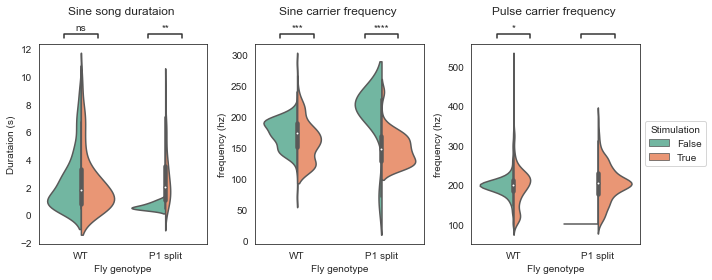

In [647]:

fig, ax = plt.subplots(1,3, figsize=(10,4), sharex=True)


g0 = sns.violinplot(ax=ax[0], x="genotype", y="val", hue="stim",
                    data=stimnostim_len_df/1000, palette="Set2", split=True)

g0.set_xticklabels(['WT','P1 split'])


ax[0].set_title('Sine song durataion \n\n')
ax[0].set_ylabel('Durataion (s)')


statannot.add_stat_annotation(
    g0,
    data=stimnostim_len_df,
    x="genotype", y="val", hue="stim",
    box_pairs=[
        ((1, 1), (1, 2)),
        ((2, 1), (2, 2))],
    test="t-test_ind",
    text_format="star",
    loc='outside')



g1 = sns.violinplot(ax=ax[1], x="genotype", y="val", hue="stim",
                    data=stimnostim_sine_freq_df, palette="Set2", split=True)

g1.set_xticklabels(['WT','P1 split'])

ax[1].set_title('Sine carrier frequency \n\n')
ax[1].set_ylabel('frequency (hz)')


statannot.add_stat_annotation(
    g1,
    data=stimnostim_sine_freq_df,
    x="genotype", y="val", hue="stim",
    box_pairs=[
        ((1, 1), (1, 2)),
        ((2, 1), (2, 2))],
    test="t-test_ind",
    text_format="star",
    loc='outside')


g2 = sns.violinplot(ax=ax[2], x="genotype", y="val", hue="stim",
                    data=stimnostim_pulse_freq_df, palette="Set2", split=True)

g2.set_xticklabels(['WT','P1 split'])

ax[0].legend([],[], frameon=False)
ax[1].legend([],[], frameon=False)

ax[2].set_title('Pulse carrier frequency \n\n ')
ax[2].set_ylabel('frequency (hz)')
ax[2].set_xlabel('Fly genotype')
ax[0].set_xlabel('Fly genotype')
ax[1].set_xlabel('Fly genotype')


statannot.add_stat_annotation(
    g2,
    data=stimnostim_pulse_freq_df,
    x="genotype", y="val", hue="stim",
    box_pairs=[
        ((1, 1), (1, 2)),
        ((2, 1), (2, 2))],
    test="t-test_ind",
    text_format="star",
    loc='outside')

legend_labels, _= g2.get_legend_handles_labels()
g2.legend(legend_labels, ['False','True'], 
          title='Stimulation', loc='center left', 
          bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

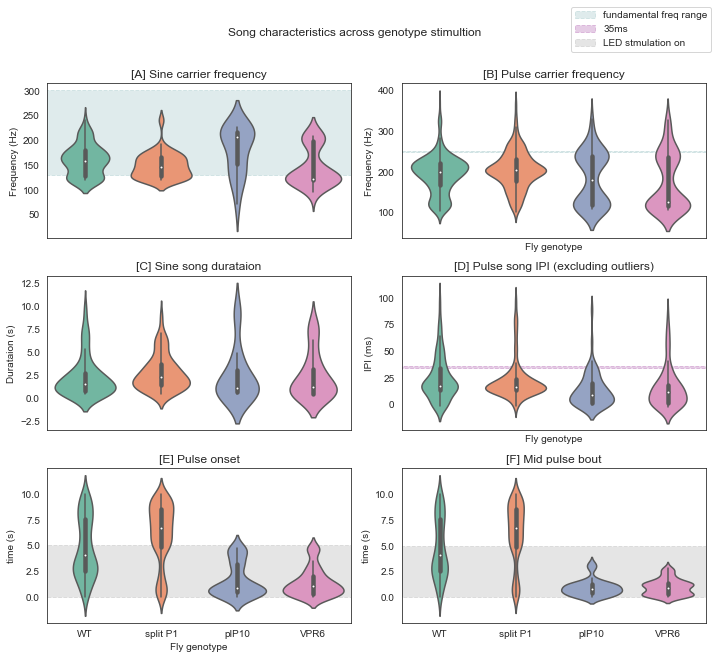

In [672]:
fig, ax = plt.subplots(3,2, figsize=(10,9), sharex=True)

plt.suptitle('Song characteristics across genotype stimultion \n\n')


#### freq

ax[0][0].set_title('[A] Sine carrier frequency')
ax[0][0].set_ylabel('Frequency (Hz)')

ax[0][0].fill_between(x=np.arange(-1,5), y1=130, y2=300, alpha=.2 ,color='cadetblue', linestyle='--')
sns.violinplot(ax=ax[0][0], data=sine_freq_df, palette="Set2")

# statannot.add_stat_annotation(
#     a,
#     data=sine_freq_df,

#     box_pairs=[('WT', 'VPR6'),
#                ],
#     test="t-test_ind",
#     text_format="star",
#     loc='inside')


ax[0][1].set_title('[B] Pulse carrier frequency')

ax[0][1].set_ylabel('Frequency (Hz)')
ax[0][1].set_xlabel('Fly genotype')

ax[0][1].fill_between(x=np.arange(-1,5), y1=248, y2=252, alpha=.2 ,color='cadetblue', linestyle='--', label='fundamental freq range')
sns.violinplot(ax=ax[0][1], data=pulse_freq_df , palette="Set2")

ax[1][0].set_title('[C] Sine song durataion')
ax[1][0].set_ylabel('Durataion (s)')
sns.violinplot(ax=ax[1][0], data=sine_len_df/1000, palette="Set2")



ax[1][1].set_title('[D] Pulse song IPI (excluding outliers)')
ax[1][1].set_ylabel('IPI (ms)')
ax[1][1].set_xlabel('Fly genotype')
ax[1][1].fill_between(x=np.arange(-1,5), y1=34, y2=36, alpha=.2 ,color='purple', linestyle='--', label='35ms')


ax[2][0].set_title('[E] Pulse onset')

ax[2][0].set_ylabel('time (s)')
ax[2][0].set_xlabel('Fly genotype')
ax[2][0].fill_between(x=np.arange(-1,5), y1=0, y2=5, alpha=.2 ,color='grey', linestyle='--')

sns.violinplot(ax=ax[2][0], data=start_pulse_pulse_df, palette="Set2")


ax[2][1].set_title('[F] Mid pulse bout')

ax[2][1].set_ylabel('time (s)')
ax[2][1].fill_between(x=np.arange(-1,5), y1=0, y2=5, alpha=.2 ,color='grey', linestyle='--', label='LED stmulation on')

sns.violinplot(ax=ax[2][1],data=mean_pulse_pulse_df, palette="Set2")


fig.legend(loc='upper right', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()



In [685]:
print(np.std(IPI_pulse_df['WT'][IPI_pulse_df['WT']<.1]),
np.std(IPI_pulse_df['VPR6'][IPI_pulse_df['VPR6']<.1]),
np.std(IPI_pulse_df['split P1'][IPI_pulse_df['split P1']<.1]))

0.020348756997999585 0.0186216288813783 0.017739550541972123


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_0 v.s. 1_1: t-test independent samples with Bonferroni correction, P_val=3.019e-06 stat=-7.382e+00
0_0 v.s. 0_1: t-test independent samples with Bonferroni correction, P_val=2.730e-03 stat=-4.093e+00
2_0 v.s. 2_1: t-test independent samples with Bonferroni correction, P_val=4.550e-01 stat=-1.662e+00
3_0 v.s. 3_1: t-test independent samples with Bonferroni correction, P_val=4.645e-02 stat=-2.809e+00


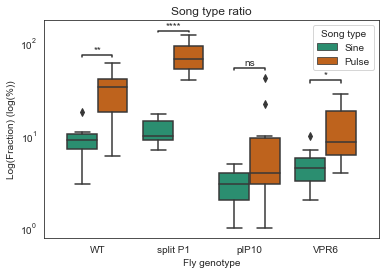

In [664]:


plt.title('Song type ratio')
g = sns.boxplot(
    data=n_bouts_df, 
    x="genotype", y="N", hue="song", palette="Dark2")
g.set_xticklabels(['WT','split P1','pIP10','VPR6'])


legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, ['Sine','Pulse'], 
          title='Song type')

g.set(yscale="log")

statannot.add_stat_annotation(
    g,
    data=n_bouts_df,
    x="genotype", y="N", hue="song",
    box_pairs=[
        ((0, 0), (0, 1)),
        ((1, 0), (1, 1)),
        ((2, 0), (2, 1)),
        ((3, 0), (3, 1))],
    test="t-test_ind",
    text_format="star",
    loc='inside')

plt.ylabel('Log(Fraction) (log(%))')
plt.xlabel('Fly genotype')
plt.show()

In [660]:
n_bouts_df

,N,song,genotype
0,7,0,0
1,3,0,0
2,9,0,0
3,11,0,0
4,9,0,0
...,...,...,...
75,28,1,3
76,5,1,3
77,10,1,3
78,6,1,3
